In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
from matplotlib.font_manager import FontProperties
%matplotlib inline

In [2]:
def generate_sample(a1, a2, std, rho, n, m):
    cov_matrix = np.asarray([[std ** 2, rho],
                             [rho, std ** 2]])
    xy = np.random.multivariate_normal([a1, a2], cov_matrix, max(n, m))
    
    return xy[:n, 0], xy[:m, 1]

In [3]:
def count_t(x, y, std):
    n = x.shape[0]
    m = y.shape[0]
    t = (np.mean(x) - np.mean(y)) / (std * np.sqrt(1/n + 1/m))
    return t

In [4]:
def show_t_distribution(a1, a2, std, rho, n, m, n_iter=400):
    t_list = []
    for _ in range(n_iter):
        x, y = generate_sample(a1, a2, std, rho, n, m)
        t_list.append(count_t(x, y, std))

    sns.plt.hist(t_list, bins=30, normed=True)
    sns.plt.plot(np.arange(-5, 5, 0.1), [st.norm.pdf(x) for x in np.arange(-5, 5, 0.1)])
    sns.plt.legend(['плотность стандартного \nнормального распределения', 'гистограмма распределения \nстатистики критерия'],
                   bbox_to_anchor=(1, 1))
    sns.plt.title('Ковариация={}'.format(rho))
    sns.plt.show()

Пусть $\normalsize{t^* = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{\sigma^2}{n} + \frac{\sigma^2}{m} - 2\rho}} \sim \mathcal{N}(0, 1)}$ при условии истинности $H0$, а $\normalsize{t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{\sigma^2}{n} + \frac{\sigma^2}{m}}}}$ - статистика критерия для независимых выборок. Тогда при $\rho > 0$: $t^* > t$, дисперсия критерия будет меньше и он будет __консервативным__; при $\rho < 0$: $t^* < t$, дисперсия увеличится и критерий будет __радикальным__. При $\rho = 0$ критерий будет __точным__.

Ниже на графиках изображена гистограмма для эмпирической функции распределения статистики критерия для различных коэффициентов ковариации $\rho$. Статистика была подсчитана для выборок из $\mathcal{N}(1, 1)$ мощностей 300 и 400 по формуле для независимых выборок.

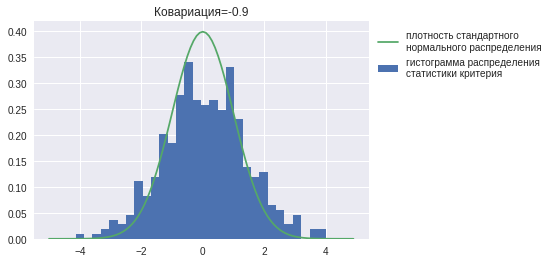

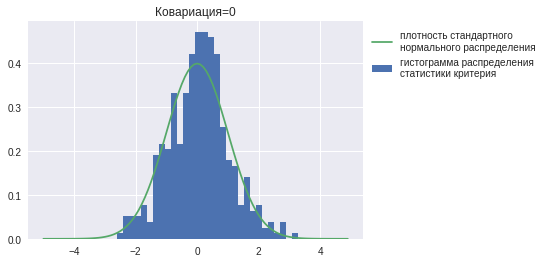

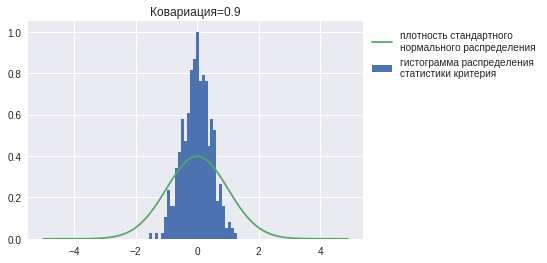

In [5]:
show_t_distribution(1, 1, 1, -0.9, 300, 400)
show_t_distribution(1, 1, 1, 0, 300, 400)
show_t_distribution(1, 1, 1, 0.9, 300, 400)

In [6]:
def check_H0(t, alpha):
    z1 = st.norm.ppf(alpha / 2)
    z2 = st.norm.ppf(1 - alpha / 2)
    if z1 <= t <= z2:
        return True
    else:
        return False

In [7]:
def show_alpha(a1, a2, std, rho, n, m, n_iter=200):
    alpha_list = []
    for alpha in np.arange(0, 1.01, 0.05):
        n_errors = 0
        for _ in range(n_iter):
            x, y = generate_sample(a1, a2, std, rho, n, m)
            t = count_t(x, y, std)
            if (a1 == a2) and not check_H0(t, alpha):
                n_errors += 1
            elif (a1 != a2) and check_H0(t, alpha):
                n_errors += 1
                
        alpha_list.append(n_errors / n_iter)

    legend = []
    if a1 == a2:
        sns.plt.plot([0, 1], [0, 1])
        legend = ['y = x', 'зависимость частоты ошибки \nпервого рода от уровня значимости']
    else:
        legend = ['зависимость частоты ошибки \nвторого рода от уровня значимости']

    sns.plt.plot(np.arange(0, 1.01, 0.05), alpha_list, c='violet')
    sns.plt.legend(legend,  bbox_to_anchor=(1, 1))
    sns.plt.title('Ковариация={}\n'.format(rho))
    sns.plt.xlabel('уровень значимости')
    sns.plt.ylabel('частота')
    sns.plt.show()

Для выборок из $\mathcal{N}(1, 1)$ мощностей 300 и 400 была произведена оценка зависимости ошибок I рода от уровня значимости. Для этого для каждого уровня значимости генерировалось 200 выборок и для каждой была проверена гипотеза $H0$ о равенстве математических ожиданий. В результате число раз, когда гипотеза $H0$ была отвергнута, делилось на число выборок.

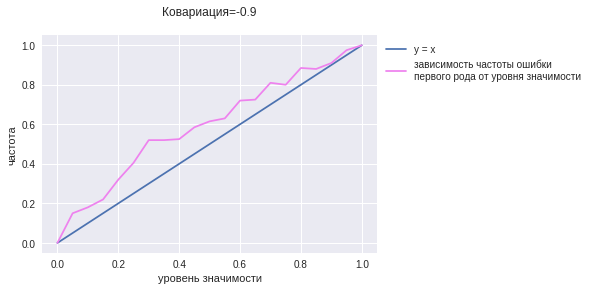

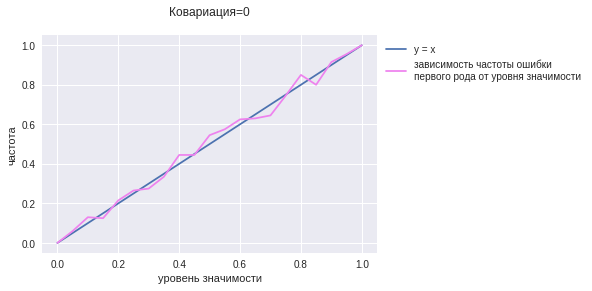

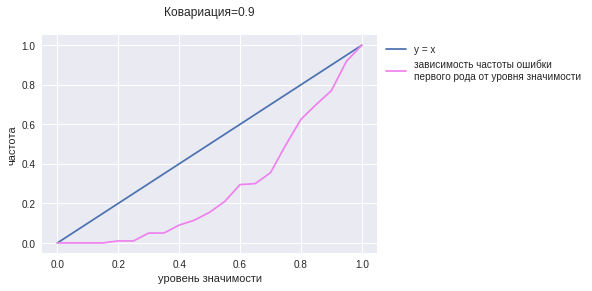

In [8]:
show_alpha(1, 1, 1, -0.9, 300, 400)
show_alpha(1, 1, 1, 0, 300, 400)
show_alpha(1, 1, 1, 0.9, 300, 400)

Для выборок из $\mathcal{N}(1, 1)$ и $\mathcal{N}(1.2, 1)$ мощностей 300 и 400 была произведена оценка зависимости ошибок II рода от уровня значимости. Для этого для каждого уровня значимости генерировалось 200 выборок и для каждой была проверена гипотеза $H0$ о равенстве математических ожиданий. В результате число раз, когда гипотеза $H0$ была принята, делилось на число выборок.

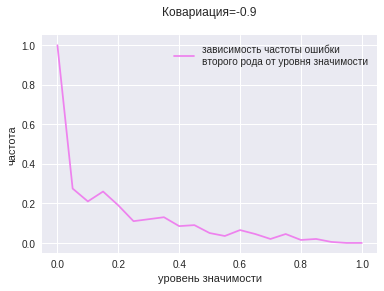

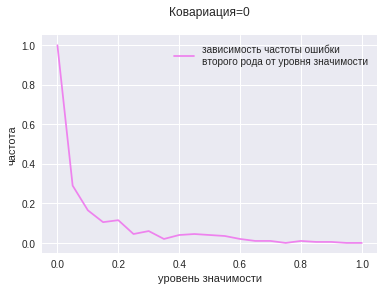

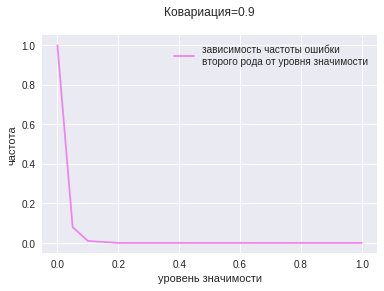

In [9]:
show_alpha(1, 1.2, 1, -0.9, 300, 400)
show_alpha(1, 1.2, 1, 0, 300, 400)
show_alpha(1, 1.2, 1, 0.9, 300, 400)